In [1]:

import torch
import numpy as np
%load_ext autoreload
%autoreload 2
from utils1 import load_data,default_loader,trainset,imshow,normal,layershow
from torch.utils.data import Dataset, DataLoader
import torchvision
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt
from torchsummary import summary

**Data Path**

In [2]:
datapath = "/home/tete/data/Youtube"
data,paths,labels = load_data(datapath)
available_field = ['url','videoname','locs','frameids','label_names','crop','scale','origRes','isYouTubeSubset']


**shift the data**

In [3]:
num_data=len(paths)
index=np.arange(num_data)
np.random.shuffle(index)
paths=[paths[i] for i in index]
labels=[labels[i] for i in index]

**partition of the data into three part**

In [4]:
#how many data we will put into each set
train_num,val_num, test_num  = int(0.50*num_data),int(num_data*0.30),int(num_data*0.2)

assert(train_num+val_num+test_num<=num_data)
train_path,train_label=paths[0:train_num],labels[0:train_num]
val_path,  val_label  =paths[train_num:train_num+val_num],labels[train_num:train_num+val_num]
test_path, test_label =paths[train_num+val_num:],labels[train_num+val_num:]

train_data  = trainset(train_path,train_label)
trainloader = DataLoader(train_data, batch_size=4,shuffle=True)

val_data  = trainset(val_path,val_label)
valloader = DataLoader(val_data, batch_size=4,shuffle=True)

test_data  = trainset(test_path,test_label)
testloader = DataLoader(test_data, batch_size=4,shuffle=True)
print("number of data in the training set    :", len(train_data))
print("number of data in the validation set  :", len(val_data))
print("number of data in the test set        :", len(test_data))

number of data in the training set    : 2500
number of data in the validation set  : 1500
number of data in the test set        : 1000


**load example data from test set**

In [5]:
count = 1
for data in testloader:
    if count == 1:
        inputs_try,labels_try = data
    count +=1
print(count,"batches")   
print(inputs_try.shape)
print(labels_try.shape)

251 batches
torch.Size([4, 3, 180, 320])
torch.Size([4, 7, 2])


In [6]:
torch.tensor(np.random.uniform(size=[10,5]),dtype=torch.float32)

tensor([[7.0252e-01, 9.4951e-01, 4.9457e-01, 2.8582e-01, 1.7958e-01],
        [7.5175e-01, 3.6829e-02, 5.9499e-01, 8.4170e-01, 8.6489e-01],
        [2.5698e-01, 4.1246e-01, 4.2847e-01, 5.3339e-01, 8.0446e-01],
        [2.9470e-01, 6.4447e-01, 7.3460e-04, 3.9740e-01, 1.9037e-01],
        [7.6100e-01, 3.1689e-01, 3.8424e-01, 7.2786e-01, 9.9410e-01],
        [1.4120e-01, 8.1981e-01, 9.0699e-01, 3.1549e-02, 9.0416e-01],
        [5.3459e-01, 3.8113e-01, 5.7116e-01, 4.4688e-01, 2.8430e-01],
        [9.2183e-01, 3.5100e-01, 9.0686e-02, 2.6354e-01, 3.1347e-01],
        [2.4544e-01, 2.0001e-01, 4.2142e-01, 2.8803e-01, 7.9284e-01],
        [3.4284e-01, 4.7644e-01, 1.3518e-01, 4.7788e-01, 2.5231e-01]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


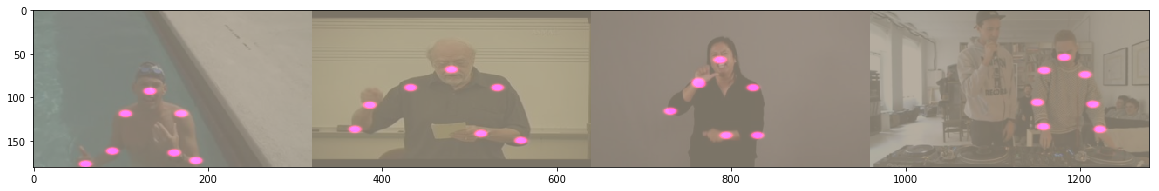

In [9]:
out = torchvision.utils.make_grid(inputs_try,padding=0)
imshow(out,labels_try) 

In [10]:
use_gpu=torch.cuda.is_available()
use_gpu

True

In [11]:
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=1, padding=1), 
            nn.ReLU(True),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, stride=2), 
            nn.Conv2d(16, 32, 3, stride=1, padding=1),  
            nn.ReLU(True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, stride=2),  
            nn.Conv2d(32, 32, 3, stride=1, padding=1),  
            nn.ReLU(True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, stride=2),
            
            
#             nn.Conv2d(32, 64, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, stride=2),
            
#             nn.Conv2d(64, 64, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, stride=2),  
            
            
#             nn.Conv2d(64, 64, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, stride=2), 
            
#             nn.Conv2d(64, 128, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(128),
#             nn.MaxPool2d(2, stride=2), 
            
#             nn.Conv2d(128, 128, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(128),
#             nn.MaxPool2d(2, stride=2),
            
#             nn.Conv2d(128, 128, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(128),
#             nn.Conv2d(128, 256, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(256),
#             nn.MaxPool2d(2, stride=2),
        )
        self.fn1=nn.Linear(32*22*40,128)
        self.fn2=nn.Linear(128,7)
    def forward(self, x):
        a=self.encoder(x)
        a=a.view(-1,32*22*40)
        a=self.fn1(a)
        a=self.fn2(a)
        b=self.encoder(x)
        b=b.view(-1,32*22*40)
        b=self.fn1(b)
        b=self.fn2(b)
        
        x=torch.cat((a,b),dim=1)
        x=x.reshape((-1,7,2))
        #print(x.shape)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Regressor().to(device)
summary(model, (3, 180, 320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 180, 320]             448
              ReLU-2         [-1, 16, 180, 320]               0
       BatchNorm2d-3         [-1, 16, 180, 320]              32
         MaxPool2d-4          [-1, 16, 90, 160]               0
            Conv2d-5          [-1, 32, 90, 160]           4,640
              ReLU-6          [-1, 32, 90, 160]               0
       BatchNorm2d-7          [-1, 32, 90, 160]              64
         MaxPool2d-8           [-1, 32, 45, 80]               0
            Conv2d-9           [-1, 32, 45, 80]           9,248
             ReLU-10           [-1, 32, 45, 80]               0
      BatchNorm2d-11           [-1, 32, 45, 80]              64
        MaxPool2d-12           [-1, 32, 22, 40]               0
           Linear-13                  [-1, 128]       3,604,608
           Linear-14                   

In [12]:
class Regressor2(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=1, padding=1), 
            nn.ReLU(True),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, stride=2), 
            nn.Conv2d(16, 32, 3, stride=1, padding=1),  
            nn.ReLU(True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, stride=2),  
            nn.Conv2d(32, 32, 3, stride=1, padding=1),  
            nn.ReLU(True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, stride=2),
            
            
#             nn.Conv2d(32, 64, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, stride=2),
            
#             nn.Conv2d(64, 64, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, stride=2),  
            
            
#             nn.Conv2d(64, 64, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2, stride=2), 
            
#             nn.Conv2d(64, 128, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(128),
#             nn.MaxPool2d(2, stride=2), 
            
#             nn.Conv2d(128, 128, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(128),
#             nn.MaxPool2d(2, stride=2),
            
#             nn.Conv2d(128, 128, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(128),
#             nn.Conv2d(128, 256, 3, stride=1, padding=1),  
#             nn.ReLU(True),
#             nn.BatchNorm2d(256),
#             nn.MaxPool2d(2, stride=2),
        )
        self.fn1=nn.Linear(32*22*40,128)
        self.fn2=nn.Linear(128,7)
    def forward(self, x):
        a=self.encoder(x)
        a=a.view(-1,32*22*40)
        a=self.fn1(a)
        a=self.fn2(a)
        b=self.encoder(x)
        b=b.view(-1,32*22*40)
        b=self.fn1(b)
        b=self.fn2(b)
        
        x=torch.cat((a,b),dim=1)
        x=x.reshape((-1,7,2))
        #print(x.shape)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Regressor().to(device)
summary(model, (3, 180, 320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 180, 320]             448
              ReLU-2         [-1, 16, 180, 320]               0
       BatchNorm2d-3         [-1, 16, 180, 320]              32
         MaxPool2d-4          [-1, 16, 90, 160]               0
            Conv2d-5          [-1, 32, 90, 160]           4,640
              ReLU-6          [-1, 32, 90, 160]               0
       BatchNorm2d-7          [-1, 32, 90, 160]              64
         MaxPool2d-8           [-1, 32, 45, 80]               0
            Conv2d-9           [-1, 32, 45, 80]           9,248
             ReLU-10           [-1, 32, 45, 80]               0
      BatchNorm2d-11           [-1, 32, 45, 80]              64
        MaxPool2d-12           [-1, 32, 22, 40]               0
           Linear-13                  [-1, 128]       3,604,608
           Linear-14                   

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3,stride=1,padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3,stride=1,padding=1)
        self.conv4 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1,padding=1)
        self.conv5 = nn.Conv2d(32, 64, kernel_size=3,stride=1,padding=1)
        self.conv6 = nn.Conv2d(64, 7, kernel_size=3,stride=1,padding=1)
        self.softmax =nn.Softmax2d()
        if use_gpu:
            self.conv1=self.conv1.cuda()
            self.conv2=self.conv2.cuda()
            self.conv3=self.conv3.cuda()
            self.softmax=self.softmax.cuda()
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        #print(x.shape)
        return self.softmax(x)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)
summary(model, (3, 180, 320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 180, 320]             896
            Conv2d-2         [-1, 64, 180, 320]          18,496
            Conv2d-3        [-1, 128, 180, 320]          73,856
         Softmax2d-4        [-1, 128, 180, 320]               0
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.66
Forward/backward pass size (MB): 154.69
Params size (MB): 0.36
Estimated Total Size (MB): 155.70
----------------------------------------------------------------


In [14]:

def train(model,data_loader,loss_fn,optimizer,n_epochs=10):
    if use_gpu:
        model=model.to("cuda")
        
    model.train(True)
    
    loss_train = np.zeros(n_epochs)
    acc_train = np.zeros(n_epochs)
    optimizer = optimizer
    
    for epoch_num in range(n_epochs):
        running_corrects = 0.0
        running_loss = 0.0
        size = 0
        for data in data_loader:
            inputs, labels = data
            bs = labels.size(0)
            
            if use_gpu:
                inputs=inputs.cuda()
                labels=labels.cuda()
            
            
            outputs = model(inputs)
            #print(outputs.shape, labels.shape)
            loss = loss_fn(outputs,labels) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #running_loss+=loss.data.item()
            #_,preds = torch.max(outputs.data,1)
            preds=outputs.data
            # statistics
            running_loss += loss.data.item()
            #print(preds.shape,labels.shape)
            #running_corrects += torch.sum(preds == labels)
            
            #if(size%int(len(data_loader)/3)==0 and size!=0):
            #    print(running_loss / size, size)
            size += bs
              
            
        epoch_loss = running_loss / size
        #epoch_acc = running_corrects.item() / size
        loss_train[epoch_num] = epoch_loss
        #acc_train[epoch_num] = epoch_acc
        print('Epoch: ',epoch_num,'Train - Loss: {:.4f}'.format(epoch_loss))
        
    return loss_train#, acc_train


In [15]:
pose_detection = Regressor()
# choose the appropriate loss
loss_fn = nn.MSELoss(reduction='sum')
#loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1.0
# your SGD optimizer
#optimizer_cl = torch.optim.Adadelta(pose_detection.parameters(),lr = learning_rate)
optimizer_cl = torch.optim.Adadelta(pose_detection.parameters(),lr = learning_rate)
# and train for 10 epochs
l_t=[]

In [75]:
l_t.extend(train(pose_detection,trainloader,loss_fn,optimizer_cl,n_epochs = 5))

Epoch:  0 Train - Loss: 40144.6730
Epoch:  1 Train - Loss: 33523.0194
Epoch:  2 Train - Loss: 32771.8629
Epoch:  3 Train - Loss: 32427.2480
Epoch:  4 Train - Loss: 32203.8417


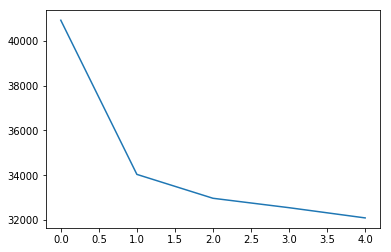

In [62]:
plt.plot(range(len(l_t)),l_t)

In [63]:
def test(model,loss_fn,optimizer,data_loader):
    model.train(False)
    if use_gpu:
        model=model.to("cuda")
    running_corrects = 0.0
    running_loss = 0.0
    size = 0

    for data in data_loader:
        inputs, labels = data    
        bs = labels.size(0)
        
        if use_gpu:
            inputs=inputs.cuda()
            labels=labels.cuda()
        
        outputs = model(inputs)
        loss = loss_fn(outputs,labels) 

        #running_loss+=loss.data.item()
        #_,preds = torch.max(outputs.data,1)
        # statistics
        running_loss += loss.data.item()
        #running_corrects += torch.sum(preds == labels)
        size += bs
    epoch_loss = running_loss / size
        #epoch_acc = running_corrects.item() / size
    loss_train[epoch_num] = epoch_loss
        #acc_train[epoch_num] = epoch_acc
    print('Test - Loss: {:.4f}'.format(epoch_loss))
    


In [71]:
pose_detection.train(False)    
preds = pose_detection(inputs_try.cuda()).cpu()
print(preds.shape)
print(labels_try.shape)

torch.Size([4, 7, 2])
torch.Size([4, 7, 2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


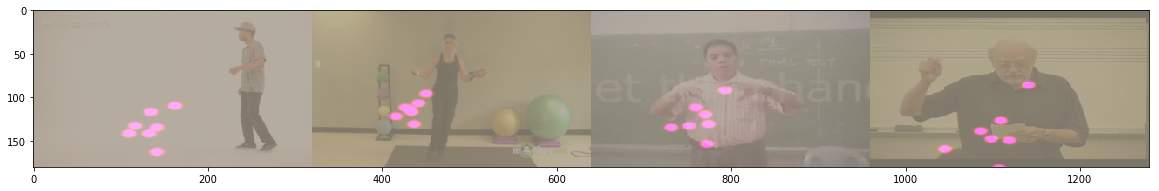

In [72]:
out = torchvision.utils.make_grid(inputs_try,padding=0)
imshow(out,preds) 